
   #      Introduction to Regression - Analysis on Wine data 

                                      Faroque Ahmed
                                    Research Associate

# Regression Analysis

Regression analysis is used to model the relationship between a response variable and one or more predictor or independent variables.

# What is Multiple Linear Regression?

Multiple linear regression is the most common form of linear regression analysis.  As a predictive analysis, the multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables.

Example- A wine dataset is provided. The task is to analyze data and build a multiple regression model to predict the quality of the wine.


# Description of data

    Name of the data: Wine data from UCI Machine learning repository
    Number of data points: 4898
    Number of features: 11
    Target attribute: Quality of wine
    Range of target attribute: 3 to 9


# Methodology

    Description of data
    Preprocess data
    Visualize data
    Build a Regression model
    Check Regression Assumptions
    Goodness of fit
    Compare different Regression methods

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import statsmodels.api as sm
import pylab
import scipy as sp

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
white_data = pd.read_csv("D:\\Faroque Ahmed\\Python Hands on Training\\2nd Batch_Materials\\3rd class\\Linear regression in Python\\winequality-white.csv")

data_head = white_data.head()
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 3), colorscale=colorscale)
py.iplot(df_table, filename='wine_quality')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]], 3), colorscale=colorscale)
py.iplot(df_table, filename='wine_quality')

# Distribution of Target Attribute

In [3]:
value_counts = white_data.quality.value_counts()
target_counts = pd.DataFrame({'quality': list(value_counts.index), 'value_count': value_counts})

# Plot 

plt.figure(figsize=(10,4))
g = sns.barplot(x='quality', y='value_count', data=target_counts, capsize=0.3, palette='spring')
g.set_title("Frequency of target class", fontsize=15)
g.set_xlabel("Quality", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

Comments:

    The quality of wine ranges from 3 to 9
    The data is not balanced. The number of data points having quality 6 is very high and quality 3 and 9 are very low.
    This may affect the model.

In [4]:
# Descriptive statistics

white_data.describe().drop(columns=['quality'])

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

# Preprocessing

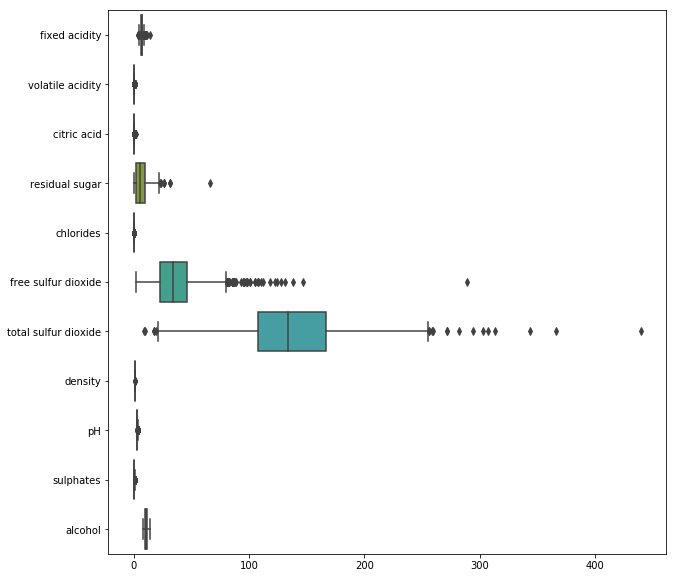

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=white_data.drop(columns=['quality']), orient='horizontal', palette='husl')


Comments:

    If we observe the above boxplot, the range of features is different from each other.
    We can normalize the data. All the variables range from 0 to 1 after normalization and don’t lose any information.

In [6]:
# Normalization of dataset

y = white_data['quality']
white_data = white_data.loc[:, ~white_data.columns.isin(['quality'])]

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(white_data)
white_data.loc[:,:] = scaled_values

white_data['quality'] = y

# plot

data_head = white_data.head()
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 3), colorscale=colorscale, )
py.iplot(df_table, filename='wine_quality')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]], 3), colorscale=colorscale, )
py.iplot(df_table, filename='wine_quality')

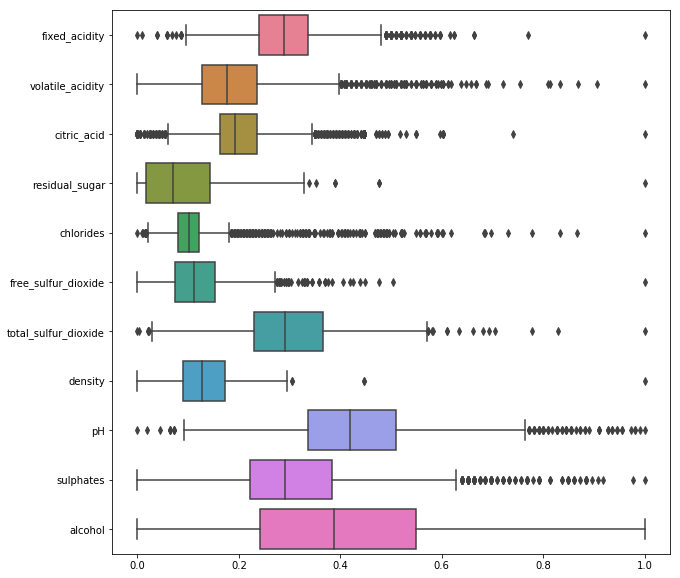

In [7]:
columns = list(white_data.columns)
new_column_names = []
for col in columns:
    new_column_names.append(col.replace(' ', '_'))
white_data.columns = new_column_names

plt.figure(figsize=(10,10))
sns.boxplot(data=white_data.drop(columns=['quality']), orient='horizontal', palette='husl')



# Distribution of features - After normalization

This looks good than before and very easy to understand the distribution of data.

# Visualization of data
Correlation between features

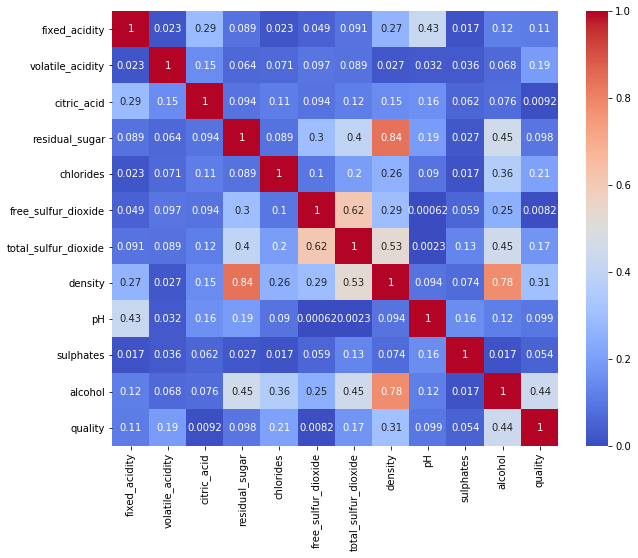

In [8]:
corr_matrix = white_data.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


Comments:

    The correlation between “density” and “residual sugar” is 0.84.
    The correlation between “alcohol” and “density” is 0.78.
    The correlation between “total sulfur dioxide” and “free sulfur dioxide” is 0.62.
    These are the three pairs of features having a high correlation(>0.5).
    
# Building a Regression model

## Linear Regression using Gradient Descent

The method of Linear Regression that finds the coefficients of different features using Gradient Descent optimization, is fit to the data to see how independent variables are contributing to the dependent variable. 

In [13]:
model_reg = LinearRegression().fit(white_data.drop(columns=['quality']), y)
y_true = white_data.quality
y_pred = model_reg.predict(white_data.drop(columns=['quality']))

In [15]:
column_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
regression_coefficient = pd.DataFrame({'Feature': column_names, 'Coefficient': model_reg.coef_}, columns=['Feature', 'Coefficient'])
regression_coefficient

Feature  Coefficient
0          fixed_acidity     0.681408
1       volatile_acidity    -1.900441
2            citric_acid     0.036670
3         residual_sugar     5.312679
4              chlorides    -0.083332
5    free_sulfur_dioxide     1.071304
6   total_sulfur_dioxide    -0.123157
7                density    -7.795240
8                     pH     0.754978
9              sulphates     0.543070
10               alcohol     1.199549

In [16]:
# Plot of coefficients

column_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(15,5))
g = sns.barplot(x='Feature', y='Coefficient', data=regression_coefficient, capsize=0.3, palette='spring')
g.set_title("Contribution of features towards target variable", fontsize=15)
g.set_xlabel("Feature", fontsize=13)
g.set_ylabel("Degree of Coefficient", fontsize=13)
g.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
g.set_xticklabels(column_names)
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points', fontsize=14, color='black')


# Ordinary Least Squares(OLS)

    In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model.
    The OLS method corresponds to minimizing the sum of squared differences between the observed and predicted values. This minimization leads to the estimators of the parameters of the model.
    The results of OLS Regression are shown below:


In [18]:
model_ols = ols("""quality ~ fixed_acidity 
                        + volatile_acidity 
                        + citric_acid
                        + residual_sugar 
                        + chlorides 
                        + free_sulfur_dioxide
                        + total_sulfur_dioxide 
                        + density 
                        + pH 
                        + sulphates 
                        + alcohol""", data=white_data).fit()

model_summary = model_ols.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:47:17   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.5509      0.107     51.650      0.000       5.340       5.762
fixed_acidity            0.6814      0.217      3.139      0.002       0.256       1.107
volatile_acidity        -1.9004      0.116    -16.373      0.000      -2.128      -1.673
citric_acid              0.0367      0.159      0.231      0.818      -0.275       0.348
residual_sugar           5.3127      0.491     10.825      0.000       4.351       6.275
chlorides               -0.0833      0.184     -0.452      0.651      -0.444       0.278
free_sulfur_dioxide      1.0713      0.242      4.422      0.000       0.596       1.546
total_sulfur_dioxide    -0.1232      0.163     -0.756      0.450      -0.443       0.196
density                 -7.7952      0.989     -7.879      0.000      -9.735      -5.856
pH                       0.7550      0.116      6.513      0.000       0.528       0.982
sulphates                0.5431      0.086      6.291      0.000       0.374       0.712
alcohol                  1.1995      0.150      7.988      0.000       0.905       1.494
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Comments:

    The R-squared is 0.282 and Adjusted R-squared is 0.280.
    If p-value > 0.05, we fail to reject the null hypothesis, otherwise we reject the null hypothesis.
    The p-values of the features “citric acid” and “chlorides”, is greater than 0.05. Also, the contribution of these features is very less.
    So, we can remove the remove the features from the data.
    Let’s fit the model again and see if there would be any change. The results of OLS Regression are shown after the removal of these two features from the data.



In [19]:
model_ols = ols("""quality ~ fixed_acidity 
                        + volatile_acidity 
                        + residual_sugar 
                        + free_sulfur_dioxide
                        + total_sulfur_dioxide 
                        + density 
                        + pH 
                        + sulphates 
                        + alcohol""", data=white_data).fit()

model_summary = model_ols.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:50:13   Log-Likelihood:                -5543.9
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.5444      0.104     53.160      0.000       5.340       5.749
fixed_acidity            0.7024      0.213      3.303      0.001       0.286       1.119
volatile_acidity        -1.9091      0.114    -16.761      0.000      -2.132      -1.686
residual_sugar           5.3505      0.480     11.148      0.000       4.410       6.291
free_sulfur_dioxide      1.0699      0.242      4.422      0.000       0.596       1.544
total_sulfur_dioxide    -0.1226      0.163     -0.753      0.451      -0.442       0.196
density                 -7.8530      0.972     -8.078      0.000      -9.759      -5.947
pH                       0.7614      0.114      6.695      0.000       0.538       0.984
sulphates                0.5451      0.086      6.324      0.000       0.376       0.714
alcohol                  1.2027      0.149      8.046      0.000       0.910       1.496
==============================================================================
Omnibus:                      114.166   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.721
Skew:                           0.073   Prob(JB):                     2.19e-55
Kurtosis:                       4.101   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no change in the values of R-squared and there is an increase of 0.001 of Adjusted R-squared. So, there is no harm in removing those features from the data. Also, the contribution of these features to predict the quality of the wine is very less as shown before. Now, we are left with 9 features.


# Checking Regression Assumptions

    Linearity
    Homoscedasticity
    Correlation of errors
    Normality of errors.

    Let’s check each condition using the predicted values and the errors/residuals.
    Residuals are the difference between “true value” and the “predicted value”.

## Linearity

    Plot partial regression plots to check linearity.

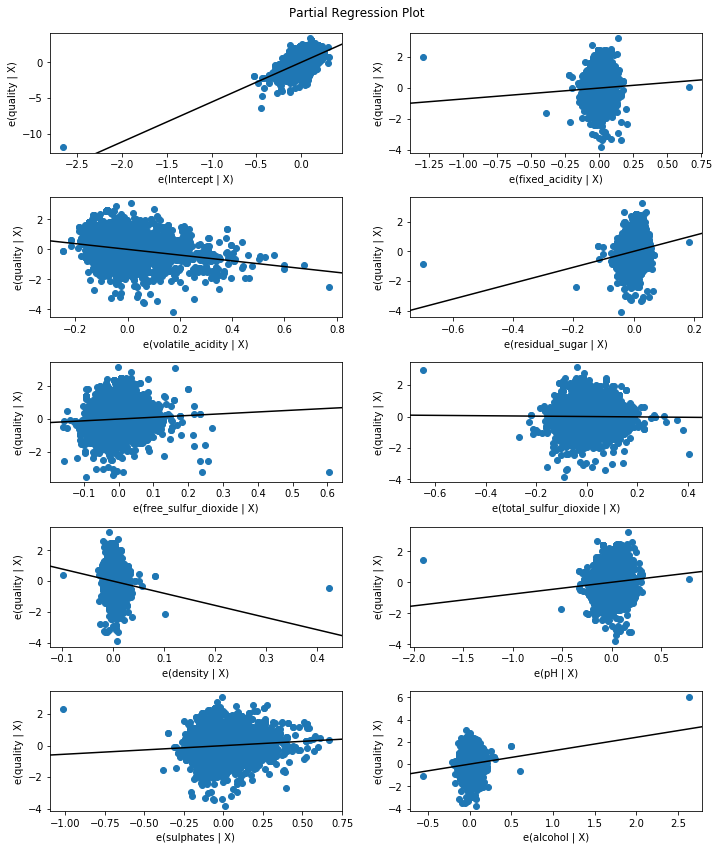

In [21]:
error = y_true - y_pred
error_info = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'error': error}, columns=['y_true', 'y_pred', 'error'])

fig = plt.figure(figsize=(10,12))
fig = sm.graphics.plot_partregress_grid(model_ols, fig=fig)



Comments:

    If we observe carefully, all the partial residual plots between the independent variable and dependent variable are linear.
    Linearity condition is satisfied.

## Homoskedasticity

    To check homoskedasticity, we plot the residuals vs predicted values/fitted values.
    If we see any kind of funnel shape, we can say that there is heteroskedasticity


Text(0, 0.5, 'Residual')

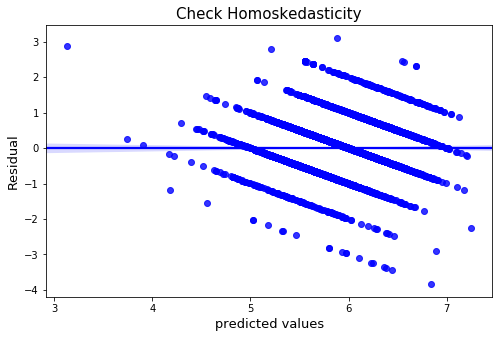

In [22]:
plt.figure(figsize=(8,5))
g = sns.regplot(x="y_pred", y="error", data=error_info, color='blue')
g.set_title('Check Homoskedasticity', fontsize=15)
g.set_xlabel("predicted values", fontsize=13)
g.set_ylabel("Residual", fontsize=13)



Comments:

    The points are not random. Also, we can see the shape of a funnel to the right, which confirms that there is heteroskedasticity.
    It means that the variance of Y across all X is not the same.
    We can conclude that, Homoskedasticity condition doesn’t hold in this case.

## Correlation of errors

    If there is no correlation between errors, then the model is good.

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
ax = error_info.error.plot()
ax.set_title('Uncorrelated errors', fontsize=15)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylabel("Residual", fontsize=13)

Text(0, 0.5, 'Residual')


Comments:

    If we observe, there is no correlation/pattern between errors. It is purely random.
    We can also check this condition using the Durbin-Watson test:
        If DW = 2, then there is no correlation.
        If DW < 2, then the errors are positively correlated.
        If DW > 2, then the errors are negatively correlated.
    If we perform Durbin-Watson test, the value of DW is 1.621.
    According to the test, we can say that the errors are positively correlated.
    However, this is a point estimate for perfect uncorrelation of errors(DW=2). So, we won’t get DW as 2 on real data. If it around 2, then we can conclude that the errors are uncorrelated.

## Normality of error terms

    This can be checked by plotting probability probability plot(p-p plot) or Quantile-Quantile plot(Q-Q plot).

Text(0, 0.5, 'Ordered Values')

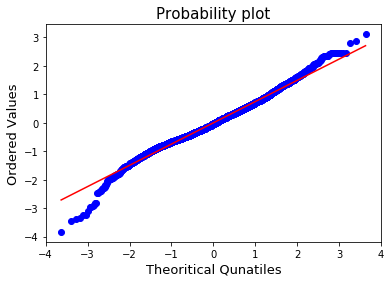

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
_ = sp.stats.probplot(error_info.error, plot=ax, fit=True)
ax.set_title('Probability plot', fontsize=15)
ax.set_xlabel("Theoritical Qunatiles", fontsize=13)
ax.set_ylabel("Ordered Values", fontsize=13)

In [25]:
ax = sm.qqplot(error_info.error, line='45')
plt.show()



Comments:

    If we observe the above plots, we can conclude that the errors are following a Normal distribution, because the plot shows the fluctuation around the line and there is not much deviation.
    The graph is linear.

## Linear Regression Assumption: Multicollinearity

    If the independent variables are independent of each other, then we say there is no multicollinearity.
    
    This can be tested in different ways:
    
    Correlation plot: If we observe the plot, there is multicollinearity between variables.
    
    Variation Inflation Factor: With VIF > 10 there is an indication that multicollinearity may be present. With VIF > 100 there is certainly multicollinearity among the variables.
    
    We can conclude that multicollinearity among variables exists.
    
    If multicollinearity is found in the data, centring the data, that is deducting the mean score might help to solve the problem. Other alternatives to tackle the problems is conducting a factor analysis/Principal Component Analysis(PCA) and rotating the factors to ensure the independence of the factors in the linear regression analysis.
    
    We can do the same analysis after applying PCA on the data. We can see some improvements in the model as there won’t be any multicollinearity.
    
    The results of OLS Regression are shown below after transforming the feature variables using PCA.

In [27]:
pca = PCA()
transform_X = pca.fit_transform(white_data.drop(columns=['quality']), white_data.quality)

columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
            'feature_8', 'feature_9', 'feature_10', 'feature_11']
transform_df = pd.DataFrame.from_records(transform_X)
transform_df.columns = columns
transform_df['quality'] = white_data.quality

model_ols_new = ols("""quality ~ feature_1 
                        + feature_2 
                        + feature_3
                        + feature_4 
                        + feature_5 
                        + feature_6 
                        + feature_7 
                        + feature_8 
                        + feature_9 
                        + feature_10 
                        + feature_11""", data=transform_df).fit()

model_summary = model_ols_new.summary()
model_summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:59:52   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8779      0.011    547.502      0.000       5.857       5.899
feature_1      1.6886      0.049     34.258      0.000       1.592       1.785
feature_2      0.2988      0.072      4.145      0.000       0.157       0.440
feature_3      0.4878      0.085      5.753      0.000       0.322       0.654
feature_4     -1.0113      0.104     -9.735      0.000      -1.215      -0.808
feature_5      2.0724      0.116     17.803      0.000       1.844       2.301
feature_6     -1.3769      0.142     -9.693      0.000      -1.655      -1.098
feature_7      1.3978      0.154      9.093      0.000       1.096       1.699
feature_8      0.6638      0.167      3.973      0.000       0.336       0.991
feature_9      0.6649      0.195      3.406      0.001       0.282       1.048
feature_10     0.9257      0.266      3.477      0.001       0.404       1.448
feature_11    -9.0805      1.117     -8.127      0.000     -11.271      -6.890
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Comments:

If we observe the p-values of transformed features, all the p-values are less than 0.05, which shows that multicollinearity problem is solved.

# Compare different Regression methods


    We can do alot of changes to improve the accuracy of the model. Some of the conditions above are violated. If we can transform the variables accordingly, we can achieve good results. If we observe the R-squared score, it is 0.282. It is able to explain only 28% of the variance, which is poor. So, there is a scope to apply different methods to get better models.
    
    I have applied different popular Regression methods on the data to compare the results we got. The below table shows the comparison of the R-squared of different methods.


In [29]:
r2_linear_regression = model_ols_new.rsquared

model_ridge=linear_model.Ridge()
model_ridge.fit(white_data.drop(columns=['quality']),white_data.quality)
y_predict_ridge = model_ridge.predict(white_data.drop(columns=['quality']))
r2_ridge = r2_score(y_true, y_predict_ridge)

model_lasso=linear_model.Lasso()
model_lasso.fit(white_data.drop(columns=['quality']),white_data.quality)
y_predict_lasso = model_lasso.predict(white_data.drop(columns=['quality']))
r2_score(y_true, y_predict_lasso)

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(white_data.drop(columns=['quality']),white_data.quality)
y_predict_knn=knn.predict(white_data.drop(columns=['quality']))
r2_knn = r2_score(y_true, y_predict_knn)

reg = linear_model.BayesianRidge()
reg.fit(white_data.drop(columns=['quality']),white_data.quality)
y_pred_reg=reg.predict(white_data.drop(columns=['quality']))
r2_bayesian = r2_score(y_true, y_pred_reg)

dec = tree.DecisionTreeRegressor(max_depth=6)
dec.fit(white_data.drop(columns=['quality']),white_data.quality)
y1_dec=dec.predict(white_data.drop(columns=['quality']))
r2_dt = r2_score(y_true, y1_dec)

svm_reg=svm.SVR()
svm_reg.fit(white_data.drop(columns=['quality']),white_data.quality)
y1_svm=svm_reg.predict(white_data.drop(columns=['quality']))
r2_svm = r2_score(y_true, y1_svm)

# TABLE

r2_list = [r2_linear_regression, r2_ridge, r2_knn, r2_dt, r2_bayesian, r2_svm]
r2_names = ['Linear Regression', 'Ridge Regression', 'KNN', 'Decision Tree', 'Bayesian Regression', 'SVM']

col = {'R-squared':r2_list, 'Method':r2_names}
df = pd.DataFrame(data=col, columns=['Method', 'R-squared'])

data_head = df
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1]], 3), colorscale=colorscale)
py.iplot(df_table, filename='wine_quality')

If we compare R-square, KNN outperformed on all the Regression methods. Also, all the methods performed better than LinearRegression. So, we can conclude there is alot of scope to improve the Linear Regression model. 